In [1]:
# Импорт нужных библиотек
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(); # более красивый внешний вид графиков по умолчанию

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';')

In [3]:
# Метод head(n) предназначен для просмотра первых n строк таблицы (по умолчанию n=5)
# Аналогично метод tail(n) возвращает последние n строк
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Если признаков (столбцов) слишком много, полезно будет транспонировать вывод
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,0.0,1.0,2.0,3.0,4.0,8.0,9.0,12.0,13.0,14.0
age,18393.0,20228.0,18857.0,17623.0,17474.0,21914.0,22113.0,22584.0,17668.0,19834.0
gender,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
height,168.0,156.0,165.0,169.0,156.0,151.0,157.0,178.0,158.0,164.0
weight,62.0,85.0,64.0,82.0,56.0,67.0,93.0,95.0,71.0,68.0
ap_hi,110.0,140.0,130.0,150.0,100.0,120.0,130.0,130.0,110.0,110.0
ap_lo,80.0,90.0,70.0,100.0,60.0,80.0,80.0,90.0,70.0,60.0
cholesterol,1.0,3.0,3.0,1.0,1.0,2.0,3.0,3.0,1.0,1.0
gluc,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
smoke,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Метод info() позволяет вывести общую информацию о датасете
# Мы можем узнать тип каждого признака, а также есть ли в данных пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [6]:
# Метод describe() позволяет собрать некоторую статистику по каждому числовому признаку
# Для более удобного прочтения полученную таблицу можно транспонировать
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70000.0,49972.419900,28851.302323,0.0,25006.75,50001.5,74889.25,99999.0
age,70000.0,19468.865814,2467.251667,10798.0,17664.00,19703.0,21327.00,23713.0
gender,70000.0,1.349571,0.476838,1.0,1.00,1.0,2.00,2.0
height,70000.0,164.359229,8.210126,55.0,159.00,165.0,170.00,250.0
weight,70000.0,74.205690,14.395757,10.0,65.00,72.0,82.00,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.00,120.0,140.00,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.00,80.0,90.00,11000.0
cholesterol,70000.0,1.366871,0.680250,1.0,1.00,1.0,2.00,3.0
gluc,70000.0,1.226457,0.572270,1.0,1.00,1.0,1.00,3.0
smoke,70000.0,0.088129,0.283484,0.0,0.00,0.0,0.00,1.0


In [7]:
df['cardio'].value_counts()

cardio
0    35021
1    34979
Name: count, dtype: int64

In [8]:
# Параметр normalize позволяет узнать процентное соотношение
df['cardio'].value_counts(normalize=True)

cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64

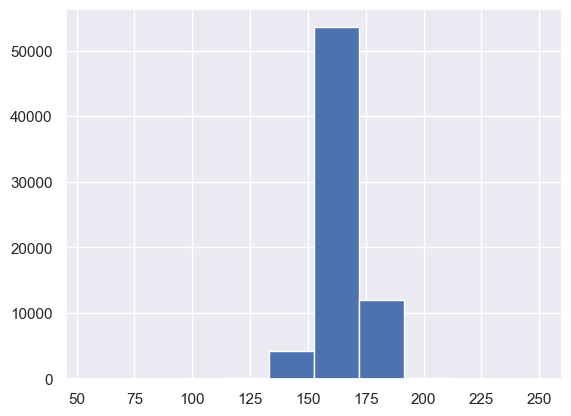

In [9]:
df['height'].hist();

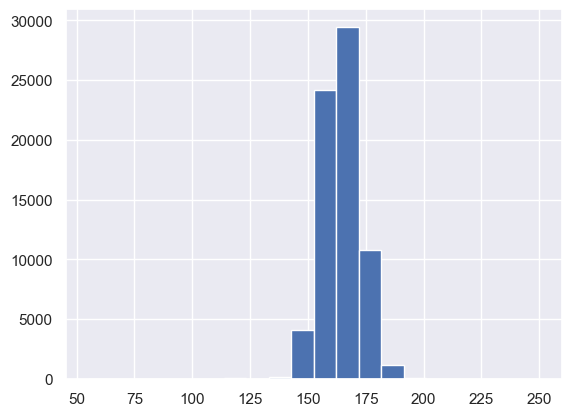

In [10]:
df['height'].hist(bins=20);

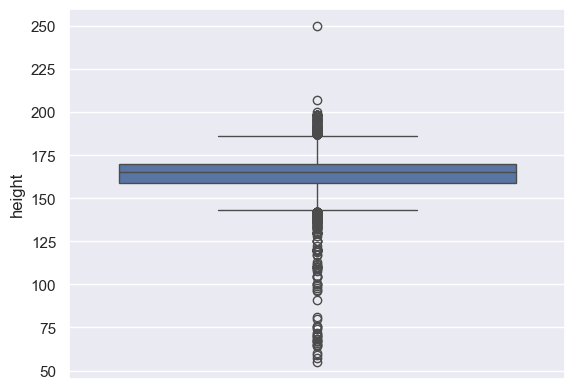

In [11]:
sns.boxplot(df['height']);

In [12]:
# Обратите внимание - мы применяем здесь метод, а не функцию round. Это значительно ускоряет вычисления
# Операция "деления столбца на число" работает интуитивно понятно - 
# каждый элемент делится на это число. Магия NumPy в действии!
df['age'] = (df['age'] / 365).round()

In [13]:
# Синтаксис предельно прост, лаконичен и интуитивно понятен
df.groupby('cardio')['age'].mean()

cardio
0    51.731218
1    54.948083
Name: age, dtype: float64

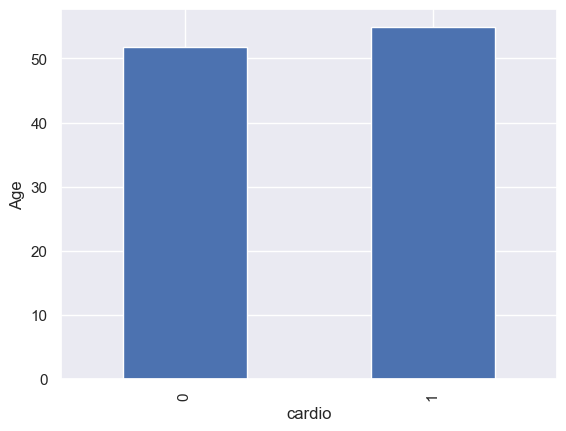

In [14]:
df.groupby('cardio')['age'].mean().plot(kind='bar') 
plt.ylabel('Age') # добавляем подпись на оси Оу
plt.show();

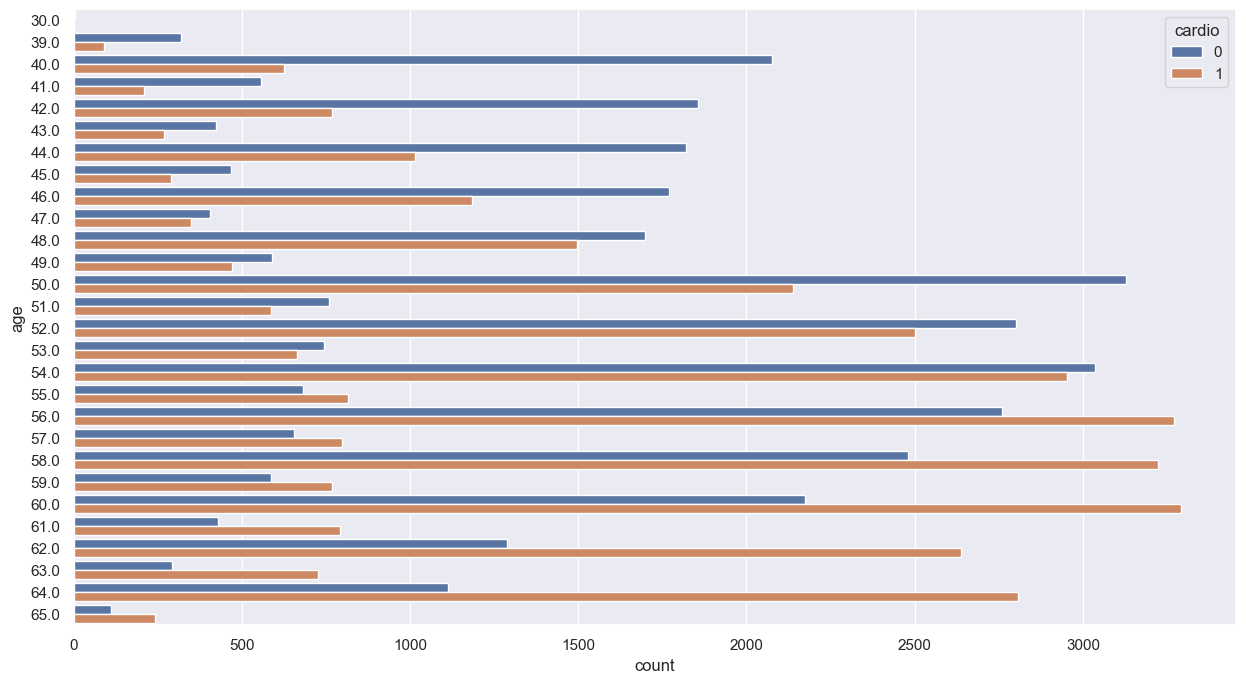

In [15]:
plt.figure(figsize=(15, 8)) # увеличим размер картинки
sns.countplot(y='age', hue='cardio', data=df);

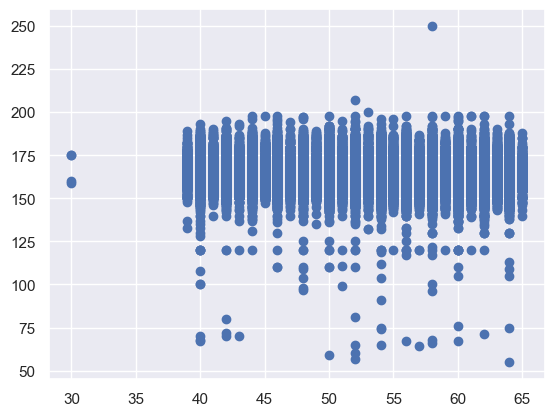

In [16]:
plt.scatter(df['age'], df['height']);

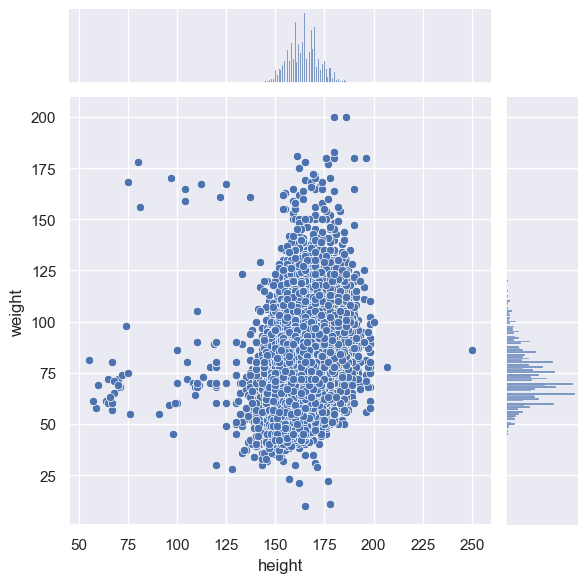

In [17]:
sns.jointplot(x='height', y='weight', data=df);

In [18]:
# values - признаки, по которым вычисляются значения функции aggfunc
# index - признаки, по которым выполняется группировка
df.pivot_table(values=['age', 'cardio'], index=['smoke', 'alco'], aggfunc='mean')

age    cardio
smoke alco                     
0     0     53.449185  0.501462
      1     53.121990  0.523037
1     0     52.493627  0.487833
      1     51.838188  0.444444

In [19]:
pd.crosstab(df['smoke'], df['alco'])

alco,0,1
smoke,,
0,61921,1910
1,4315,1854


In [20]:
h = df['height'] # сохраним всю колонку "рост" в отдельную переменную для экспериментов
type(h) # посмотрим тип 

pandas.core.series.Series

In [22]:
first_patient = df.iloc[0]
print(first_patient)

id               0.0
age             50.0
gender           2.0
height         168.0
weight          62.0
ap_hi          110.0
ap_lo           80.0
cholesterol      1.0
gluc             1.0
smoke            0.0
alco             0.0
active           1.0
cardio           0.0
Name: 0, dtype: float64


In [24]:
print(df.loc[0, 'age'])

50.0


In [25]:
h_meters = h / 100 # предельно просто!
h_meters[:10] # в отдельных столбцах уже можно применять "обычные" срезы, как в списках

0    1.68
1    1.56
2    1.65
3    1.69
4    1.56
5    1.51
6    1.57
7    1.78
8    1.58
9    1.64
Name: height, dtype: float64

In [26]:
%%timeit
lilliputs = 0
for value in h:
    if value < 125:
        lilliputs = lilliputs + 1

7.54 ms ± 655 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
%%timeit
h[h < 125].shape[0]

259 μs ± 17.5 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [28]:
# Вычислим средний возраст людей, склонных к курению
df[df['smoke'] == 1]['age'].mean()

52.29664451288701

In [29]:
# Условие может быть составным
df[(df['smoke'] == 1) & (df['cardio'] == 1)]['age'].mean()

53.76135199726869

In [30]:
# Удалим целевой признак cardio
dummy_df = df.drop('cardio', axis=1)
dummy_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0


In [31]:
# Удалим первые 100 пациентов
dummy_df = df.drop(np.arange(100), axis=0)
dummy_df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
100,135,40.0,2,171,61.0,110,70,1,1,0,0,1,0
101,136,51.0,1,167,80.0,190,90,2,1,0,1,0,0
102,137,47.0,1,168,77.0,100,70,1,1,0,0,1,0
103,138,50.0,2,183,95.0,125,80,1,3,1,0,1,0
104,139,60.0,1,170,72.0,120,80,1,1,0,0,0,1


In [32]:
# Удалим всех пацентов с ростом ниже 125 см, а также выше 200 см
dummy_df = df.drop(df[(df['height'] < 125) | (df['height'] > 200)].index)
dummy_df.shape[0] / df.shape[0]

0.9987285714285714

In [33]:
df['height_cm'] = df['height'] / 100
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,1.68
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,1.56
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,1.65
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,1.69
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,1.56


In [34]:
new_values = {1:'low', 2:'normal', 3:'high'} # обычный словарь Python
df['dummy_cholesterol'] = df['cholesterol'].map(new_values)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm,dummy_cholesterol
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,1.68,low
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,1.56,high
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,1.65,high
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,1.69,low
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,1.56,low


In [35]:
df['cardio'] = df['cardio'].astype(bool)
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_cm,dummy_cholesterol
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,False,1.68,low
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,True,1.56,high
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,True,1.65,high
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,True,1.69,low
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,False,1.56,low
